# Projecto Final:  **Market Basket Analysis** for an Online Retail Bussines

**Date:**  
April 2025

**Proyect Goal:**  
Analizar las compras realizadas en una tienda online durante un año, para descubrir patrones sobre qué productos suelen comprarse juntos. Estos patrones permiten a la empresa entender mejor los hábitos de sus clientes y tomar decisiones inteligentes, como ofrecer sugerencias de compra, mejorar promociones o reorganizar productos en la tienda para aumentar las ventas.  
<small>

* Ejemplos de lo que se puede lograr con este análisis:

    - **Sugerencias automáticas:** Si un cliente agrega una tetera al carrito, el sistema puede recomendarle también tazas de té.  
    - **Promociones combinadas:** Ofrecer descuentos si alguien compra papel de regalo y tarjetas de felicitación juntas.  
    - **Organización de la tienda online:** Mostrar cojines decorativos junto a sofás porque muchos clientes los compran juntos.  
    - **Campañas de email personalizadas:** Enviar ofertas de velas perfumadas a clientes que anteriormente compraron ambientadores.  
    - **Optimización del inventario:** Saber que los manteles se venden más cuando hay promociones de vajillas y preparar stock suficiente.





**Dataset:**  
Este dataset pertenece a la empresa **"Online Retail II"**, cuyo nombre no se especifica por motivos de confidencialidad, la cual se dedica a la venta de artículos de regalo para toda ocasión, y una parte importante de sus clientes son mayoristas. El dataset recopila un año completo de sus transacciones. 

<small> 

* Overview:  
    - Time Range: 1 December 2010 – 9 December 2011 (one full year)
    - Transactions: 541,909 rows
    - Features: 8
    - Business Type: Online giftware retailer (many wholesale customers)
    - Region: Primarily UK

* Typical Columns (Features):
    - InvoiceNo: Invoice number (unique ID for each transaction)
    - StockCode: Product/item code
    - Description: Item name
    - Quantity: Number of items purchased
    - InvoiceDate: Date and time of transaction
    - UnitPrice: Price per item (in GBP)
    - CustomerID: Unique ID for each customer
    - Country: Customer’s country

* This dataset is often used for:
    - Customer Segmentation (e.g., using RFM analysis)
    - Sales Analysis & Forecasting
    - Market Basket Analysis (e.g., association rules with Apriori)
    - Data Cleaning & Preprocessing Practice


* Source:  
    - https://archive.ics.uci.edu/dataset/502/online+retail+ii  
    - https://www.kaggle.com/datasets/thedevastator/online-retail-sales-and-customer-data/data

## ✔️ 0. CONFIGURACIÓN INICIAL

In [12]:
# ◯ 0. CONFIGURACIÓN INICIAL
# -------------------------------------------------------------------------------------------------

# ✓ Ruta del dataset
ruta_archivo = '/workspaces/Final_Project_MBA/data/raw/data.csv' 

# ✓ Parámetros de EDA
top_n_productos = 10  # Número de productos más vendidos a graficar

# ✓ Parámetros de Apriori
min_support = 0.01    # Soporte mínimo
min_lift = 1.0        # Lift mínimo
min_confidence = 0.5  # Confianza mínima (opcional si quieres filtrar más adelante)


## ✔️ 1. IMPORTAR LIBRERIAS

In [13]:
# ◯ 1. IMPORTAR LIBRERÍAS
# ------------------------------------------------------------------

# ✓ Librerías para la manipulación de datos
import os
import pickle 
import numpy as np
import datetime as dt
import pandas as pd 
from IPython.display import display
from deep_translator import GoogleTranslator

# ✓ Librerías para la visualización
import matplotlib.pyplot as plt 
import seaborn as sns

# ✓ Librerías para el análisis de datos
#! pip install --upgrade pip
#! pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# ✓ Parámetros de visualización
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.4f}'.format)


## ✔️ 2. CARGA DE DATOS

Objective: Obtain the data from source and get a first glimpse of their properties and presentation

In [14]:
# ◯ 2. CARGA DE DATOS
# ------------------------------------------------------------------

df_raw = pd.read_csv(ruta_archivo, encoding="ISO-8859-1")       # Cargar datos originales
df_baking = df_raw.copy()                                       # Copia para el procesamiento (aplicar limpieza y procesamiento sobre df_baking)
df = df_baking.copy()                                           # Copia final para el Analisis   

# data = pd.read_csv('data.csv', encoding="ISO-8859-1")

## ✔️ 3. EDA INICIAL

In [15]:
# ◯ 3. EDA INICIAL
# -------------------------------------------------------------------------------------------------

print("\n✅ Shape inicial:", df_raw.shape)
print("\n✅ Muestra Aleatoria de Observaciones:\n")
display(df_raw.sample(10,random_state=2025))
print("\n✅ Info general:")
print(df_raw.info())
print("\n✅ Valores nulos por columna:\n", df_raw.isnull().sum().loc[lambda x: x > 0])


✅ Shape inicial: (541910, 8)

✅ Muestra Aleatoria de Observaciones:



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
411342,572216,22338,STAR DECORATION PAINTED ZINC,10,10/21/2011 12:56,0.1900,16015.0000,United Kingdom
464062,576076,22960,JAM MAKING SET WITH JARS,2,11/13/2011 16:18,4.2500,14382.0000,United Kingdom
320553,C565001,22767,TRIPLE PHOTO FRAME CORNICE,-4,8/31/2011 16:23,9.9500,17675.0000,United Kingdom
85624,543484,21080,SET/20 RED RETROSPOT PAPER NAPKINS,12,2/9/2011 10:11,0.8500,12721.0000,France
477470,577058,22371,AIRLINE BAG VINTAGE TOKYO 78,1,11/17/2011 14:29,4.2500,18122.0000,United Kingdom
139502,548325,16259,PIECE OF CAMO STATIONERY SET,108,3/30/2011 13:01,0.2100,13509.0000,United Kingdom
407182,571847,22109,FULL ENGLISH BREAKFAST PLATE,4,10/19/2011 12:39,3.7500,15220.0000,United Kingdom
410867,572183,22383,LUNCH BAG SUKI DESIGN,30,10/21/2011 10:50,1.6500,16153.0000,United Kingdom
22511,538171,21877,HOME SWEET HOME MUG,2,12/9/2010 20:01,1.2500,17530.0000,United Kingdom
133819,547799,21929,JUMBO BAG PINK VINTAGE PAISLEY,10,3/25/2011 12:48,1.9500,17139.0000,United Kingdom



✅ Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

✅ Valores nulos por columna:
 Description      1454
Customer ID    135080
dtype: int64


## ✔️ 4. PROCESASMIENTO DE DATOS

Objectives: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled


In [16]:
# ◯ 4. PROCESAMIENTO DE DATOS
# -------------------------------------------------------------------------------------------------

# ✓ Eliminar filas con valores nulos en columnas
df_baking = df_baking.dropna() 
print("T1: ", df_baking.shape) 

# ✓ En este caso solo nos quedaremos con las columnas necesarias(Invoice, Description, Quantity y Country).
df_baking = df_baking.drop(columns=['StockCode', 'InvoiceDate', 'Price', 'Customer ID'])
print("T2: ", df_baking.shape) 

# ✓ Renombrar columnas pasandolas a minuscula
df_baking.columns = df_baking.columns.str.lower()
print("T3: ", df_baking.shape) 

# ✓ Filtrar United Kingdom
#    El dataset contiene transacciones de varios países, pero nos enfocaremos en el Reino Unido,
#    ya que es donde se encuentran la mayoria de transaccciones (91.5%). 
df_baking = df_baking[df_baking['country'] == 'United Kingdom'].copy()
print("T4: ", df_baking.shape) 


# ✓ Eliminar facturas canceladas:
#   Las devoluciones tienen valores negativos en Quantity y normalmente un código de factura que empieza con 'C'.
#   Estas transacciones no son útiles para MBA, ya que no representan compras reales.
#   En este caso lo resolveremos, asegurandonos que solo se incluyan transacciones de compra (cantidad > 0)
df_baking = df_baking[df_baking['quantity'] > 0]
print("T5: ", df_baking.shape) 


# ✓ Limpieza de descripciones: Normalizar y limpiar los nombres de productos
#                              Convertimos los nombres de productos (Description) a minúsculas y eliminamos espacios extra.
df_baking['description'] = df_baking['description'].str.strip().str.lower()
print("T6: ", df_baking.shape) 

# ✓  Tipos de datos
#    Cambiamos los tipos de datos de las columnas a los más adecuados para optimizar el rendimiento.

df_baking['invoice'] = df_baking['invoice'].astype(str)       # Convertimos los códigos de factura a string (evita errores de agrupación)
df_baking['description'] = df_baking['description'].astype('category')
df_baking['country'] = df_baking['country'].astype('category')
print("T7: ", df_baking.shape) 


df = df_baking.copy()

# ✓ Revisar df
print("\n✅ Shape df:", df.shape)
print("\n✅ Muestra Aleatoria de Observaciones en df:\n")
display(df.sample(10,random_state=2025))
print("\n✅ Info general df:")
print(df.info())

T1:  (406830, 8)
T2:  (406830, 4)
T3:  (406830, 4)
T4:  (361878, 4)
T5:  (354345, 4)
T6:  (354345, 4)
T7:  (354345, 4)

✅ Shape df: (354345, 4)

✅ Muestra Aleatoria de Observaciones en df:



,invoice,description,quantity,country
295211,562778,gin + tonic diet metal sign,24,United Kingdom
250060,558995,alarm clock bakelike orange,4,United Kingdom
393456,570827,20 dolly pegs retrospot,2,United Kingdom
168213,551014,lunch bag cars blue,10,United Kingdom
517195,580044,vintage glass t-light holder,12,United Kingdom
355080,567905,set of 36 paisley flower doilies,12,United Kingdom
224615,556538,t-light glass fluted antique,12,United Kingdom
464731,576179,retro plastic elephant tray,144,United Kingdom
480810,577318,set of 4 knick knack tins london,6,United Kingdom
465188,576213,letter shape pencil sharpener,80,United Kingdom



✅ Info general df:
<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   invoice      354345 non-null  object  
 1   description  354345 non-null  category
 2   quantity     354345 non-null  int64   
 3   country      354345 non-null  category
dtypes: category(2), int64(1), object(1)
memory usage: 9.3+ MB
None


## ✔️ 5. EDA DESCRIPTIVO

In [18]:
display(df.describe(include='number').T)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
quantity,354345.0000,12.0489,190.4281,1.0000,2.0000,4.0000,12.0000,80995.0000


,count,unique,top,freq
description,354345,3833,white hanging heart t-light holder,1940
country,354345,1,United Kingdom,354345


# In test 1

In [21]:
# ◯ 2. AGRUPAR DESCRIPCIONES POR FACTURA
# ------------------------------------------------------------------------------------------------
df_agg = (
    df_baking
    .groupby('invoice')['description']
    .apply(lambda items: ','.join(items.astype(str)))
)

df_agg.sample(10,random_state=2025)

invoice
555550                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# ◯ 2. AGRUPAR DESCRIPCIONES POR FACTURA
# ------------------------------------------------------------------------------------------------
df_agg = (
    df_baking
    .groupby('invoice')['description']
    .apply(lambda items: ','.join(items.astype(str)))
)

# ◯ 3. ONE-HOT ENCODING (0/1) DE PRODUCTOS
# ------------------------------------------------------------------------------------------------
basket = df_agg.str.get_dummies(sep=',').astype(int)


# ◯ 4. AJUSTAR THRESHOLDS PARA REDUCIR EL BASKET ANTES DE PASARLO POR EL ALGORITMO
# ------------------------------------------------------------------------------------------------
min_support  = 0.01
top_n_items  = 200

# ◯ 5. FILTRAR POR SUPPORT MÍNIMO
# ------------------------------------------------------------------------------------------------
support     = basket.sum(axis=0) / len(basket)
cols_freq   = support[support >= min_support].index
basket_freq = basket[cols_freq]

# ◯ 6. SELECCIONAR TOP-N MÁS VENDIDOS
# ------------------------------------------------------------------------------------------------
counts      = basket_freq.sum(axis=0)
top_items   = counts.nlargest(top_n_items).index
basket_sel  = basket_freq[top_items]


# ◯ 7. OPCIONAL: CONVERTIR A SPARSE
# ------------------------------------------------------------------------------------------------
basket_final = basket_sel.astype(pd.SparseDtype("int", fill_value=0))


# ◯ 9. VERIFICAR RESULTADOS
# ------------------------------------------------------------------------------------------------
print("Shape original (binaria):", basket.shape)
print("Tras support>=%.2f:" % min_support, basket_freq.shape)
print("Después top %d:" % top_n_items, basket_final.shape)
display(basket_final)

NameError: name 'basket_sel' is not defined

## out test 1

## ✔️ 6. EDA VISUAL - TOP PRODUCTS

In [86]:
# ◯ Obtener los 10 productos más comprados
# ----------------------------------------------------------------------------------

# Se selecciona la columna 'description' del DataFrame df, que contiene las descripciones de los productos.
# Luego se cuenta la frecuencia de cada producto utilizando value_counts()
top_products = (df['description']
                .value_counts()  # Cuenta las ocurrencias de cada valor único en 'description'
                .nlargest(10))  # Selecciona los 10 productos más frecuentes

# ◯ Crear un DataFrame con los productos más comprados
# ----------------------------------------------------------------------------------

# Convierte la serie 'top_products' en un DataFrame, con el índice (nombre del producto) convertido a una columna.
# 'reset_index()' reinicia el índice y agrega una columna llamada 'index' que contiene los nombres de los productos.
top_products_df = pd.DataFrame(top_products).reset_index()

# ◯ Mostrar el DataFrame con los 10 productos más comprados
top_products_df

,description,count
0,white hanging heart t-light holder,1940
1,jumbo bag red retrospot,1464
2,regency cakestand 3 tier,1426
3,assorted colour bird ornament,1333
4,party bunting,1308
5,lunch bag red retrospot,1147
6,lunch bag black skull.,1049
7,set of 3 cake tins pantry design,1020
8,paper chain kit 50's christmas,982
9,heart of wicker small,952


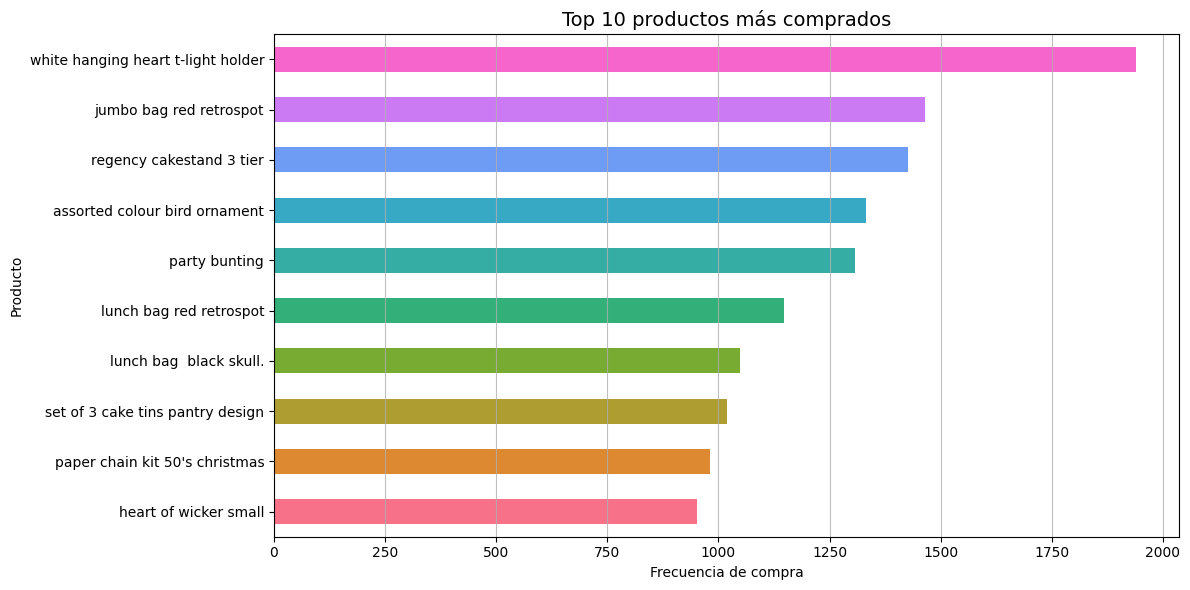

In [87]:
# ◯ Visualización de los productos más comprados
# ---------------------------------------------------------------------------------

# ✓ Visualización de los productos más comprados
#    Se utiliza un gráfico de barras horizontales para mostrar los 10 productos más comprados.
#    Se ordenan de mayor a menor frecuencia de compra.

# Paleta de colores degradados de rosa (color fuerte arriba)
colors = sns.color_palette("husl", len(top_products))  # Paleta de colores viridis

# Crear gráfico
plt.figure(figsize=(12, 6))
top_products.sort_values().plot(kind='barh', color=colors)  # sort para que el más alto esté arriba
plt.title('Top 10 productos más comprados', fontsize=14)
plt.xlabel('Frecuencia de compra')
plt.ylabel('Producto')
plt.grid(axis='x', alpha=0.8)
plt.tight_layout()
plt.show()

## ✔️ 7. CREAR LA MATRIZ DE TRANSACCIONES (Basket Matrix)

The basket matrix contendra la cantidad comprada de cada producto por transaccion (invoice).

Este data frame es básicamente la cesta que nuestros clientes llevan al cajero de nuestra tienda.  
Nos muestra cuánto compró este cliente/transacción (N.º de factura) por un artículo en particular.  
Si el número es 0, el cliente no compró ese artículo.  
Si muestra otro valor (8, por ejemplo), significa que el cliente ha comprado hasta 8 artículos.  

Para esto:  
Agrupamos los productos por factura y convertimos cada factura en una fila con los productos como columnas.

In [88]:
# ◯ Paso 1: Agrupar por factura y producto para construir la cesta
# ---------------------------------------------------------------------------------

# ✓ Sumamos las cantidades de cada producto dentro de cada factura
basket = df.groupby(['invoice', 'description'], observed=True)['quantity'].sum()
basket

invoice  description                        
536365   cream cupid hearts coat hanger          8
         glass star frosted t-light holder       6
         knitted union flag hot water bottle     6
         red woolly hottie white heart.          6
         set 7 babushka nesting boxes            2
                                                ..
581585   zinc willie winkie  candle stick       24
581586   doormat red retrospot                  10
         large cake stand  hanging strawbery     8
         red retrospot round cake tins          24
         set of 3 hanging owls ollie beak       24
Name: quantity, Length: 344293, dtype: int64

In [89]:
# ◯ Paso 2: Convertir la serie a una tabla con productos como columnas
# ---------------------------------------------------------------------------------

# ✓ Convertimos la serie a un DataFrame

basket = basket.unstack() # Unstack convierte las combinaciones (invoice, description) en una matriz
basket

description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoice,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# ◯ Paso 3: Reemplazar valores faltantes (productos no comprados) por 0
# ---------------------------------------------------------------------------------

# ✓ Reemplazamos los valores NaN por 0
#   Así sabemos qué productos no fueron comprados en cada factura

basket = basket.reset_index().fillna(0).set_index('invoice')
    #   reset_index() convierte el índice en una columna normal
    #   fillna(0) reemplaza los NaN por 0
    #   set_index('invoice') vuelve a establecer la columna 'invoice' como índice
basket

description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoice,,,,,,,,,,,,,,,,,,,,,
536365,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
536366,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
536367,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
536368,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
536369,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
581583,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
581584,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### → ENCODE DE DATA:

En el market basket analysis, lo importante no es la cantidad comprada de cada artículo, sino que lo importante es saber si un artículo fue comprado o no.
Ya que nuestro fin es saber cuál es la asociación entre comprar ciertos artículos y comprar otros.
Por lo tanto, necesitamos codificar los datos de la canasta en datos binarios que indiquen si un artículo fue comprado (1) o no (0).

De esta forma, generamos un data frame que nos muestra si un artículo en particular fue comprado o no.

In [ ]:
# Aplicamos map a cada columna para convertir los valores a 1 o 0

## 1er Forma:
basket = basket.apply(lambda col: col.map(lambda x: 1 if x > 0 else 0))
basket




description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoice,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# test 2

In [ ]:
# ◯ 4. AJUSTAR THRESHOLDS PARA REDUCIR EL BASKET ANTES DE PASARLO POR EL ALGORITMO
# ------------------------------------------------------------------------------------------------
min_support  = 0.01
top_n_items  = 200

# ◯ 5. FILTRAR POR SUPPORT MÍNIMO
# ------------------------------------------------------------------------------------------------
support     = basket.sum(axis=0) / len(basket)
cols_freq   = support[support >= min_support].index
basket_freq = basket[cols_freq]

# ◯ 6. SELECCIONAR TOP-N MÁS VENDIDOS
# ------------------------------------------------------------------------------------------------
counts      = basket_freq.sum(axis=0)
top_items   = counts.nlargest(top_n_items).index
basket_sel  = basket_freq[top_items]


## test 2

In [28]:
# Asegúrate de tener definido el DataFrame `basket` como binario (1/0 o True/False)

# Paso 1: Total de transacciones
total_transactions = len(basket)

# Paso 2: Cantidad de veces que se compró cada producto
purchase_counts = basket.sum()

# Paso 3: Soporte promedio (frecuencia relativa)
mean_support = basket.mean()

# Paso 4: Crear DataFrame resumen
product_summary = pd.DataFrame({
    "Cant. Veces Comprado": purchase_counts,
    "Cant. Total de Transacciones": total_transactions,
    "Mean": mean_support,
    "Porcentaje (%)": mean_support * 100
})

# Paso 5: Ordenar por porcentaje descendente
product_summary = product_summary.sort_values(by="Porcentaje (%)", ascending=False)

# Mostrar tabla
product_summary  

,Cant. Veces Comprado,Cant. Total de Transacciones,Mean,Porcentaje (%)
description,,,,
white hanging heart t-light holder,1884,16649,0.1132,11.3160
jumbo bag red retrospot,1447,16649,0.0869,8.6912
regency cakestand 3 tier,1410,16649,0.0847,8.4690
assorted colour bird ornament,1300,16649,0.0781,7.8083
party bunting,1291,16649,0.0775,7.7542
...,...,...,...,...
"bread bin, diner style, ivory",1,16649,0.0001,0.0060
"bread bin, diner style, mint",1,16649,0.0001,0.0060
16 pc cutlery set pantry design,1,16649,0.0001,0.0060


In [29]:
# Filtrar productos con más del 1% de soporte
productos_mas_1 = product_summary[product_summary["Porcentaje (%)"] > 1]

# Mostrar el resultado
productos_mas_1

,Cant. Veces Comprado,Cant. Total de Transacciones,Mean,Porcentaje (%)
description,,,,
white hanging heart t-light holder,1884,16649,0.1132,11.3160
jumbo bag red retrospot,1447,16649,0.0869,8.6912
regency cakestand 3 tier,1410,16649,0.0847,8.4690
assorted colour bird ornament,1300,16649,0.0781,7.8083
party bunting,1291,16649,0.0775,7.7542
...,...,...,...,...
paper bunting vintage paisley,167,16649,0.0100,1.0031
filigris heart with butterfly,167,16649,0.0100,1.0031
ceramic cherry cake money bank,167,16649,0.0100,1.0031


In [30]:
# Obtener nombres de productos con soporte > 5%
productos_validos = productos_mas_1.index

# Filtrar el basket solo con esos productos
basket_filtrado = basket[productos_validos]

# Verificar resultado
basket_filtrado

description,white hanging heart t-light holder,jumbo bag red retrospot,regency cakestand 3 tier,assorted colour bird ornament,party bunting,lunch bag red retrospot,set of 3 cake tins pantry design,lunch bag black skull.,paper chain kit 50's christmas,natural slate heart chalkboard,...,gingham heart doorstop red,doormat black flock,heads and tails sporting fun,hanging heart mirror decoration,jam jar with green lid,paper bunting vintage paisley,filigris heart with butterfly,ceramic cherry cake money bank,36 pencils tube skulls,spaceboy gift wrap
invoice,,,,,,,,,,,,,,,,,,,,,
536365,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Aplicar Apriori sobre el basket filtrado
frequent_itemsets = apriori(
    basket_filtrado.astype(bool),
    min_support=0.005,      # 0.5%
    use_colnames=True,
    max_len=2,             # Limita la búsqueda a conjuntos de como máximo 2 ítems, lo que reduce el coste computacional y evita que aparezcan tríos, cuarteto
    low_memory=True        # optimiza uso de memoria
)

# Ordenar por soporte y agregar longitud
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).reset_index(drop=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)

# Ver resultado
frequent_itemsets

,support,itemsets,length
0,0.1132,(white hanging heart t-light holder),1
1,0.0869,(jumbo bag red retrospot),1
2,0.0847,(regency cakestand 3 tier),1
3,0.0781,(assorted colour bird ornament),1
4,0.0775,(party bunting),1
...,...,...,...
2292,0.0050,"(knitted union flag hot water bottle, hot water bottle keep calm)",2
2293,0.0050,"(jumbo bag red retrospot, gin + tonic diet metal sign)",2
2294,0.0050,"(jumbo bag vintage doily, hot water bottle keep calm)",2
2295,0.0050,"(pack of 60 pink paisley cake cases, jumbo bag red retrospot)",2


In [37]:
# Generar reglas de asociación a partir de los conjuntos frecuentes
rules = association_rules(
    frequent_itemsets,
    metric='lift',        # Usamos 'lift' como métrica principal
    min_threshold=1.0     # Solo reglas con lift >= 1 (asociación útil)
)

# Ordenar por lift y reiniciar índices
rules = rules.sort_values(by='lift', ascending=False).reset_index(drop=True)

# Mostrar columnas clave
rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)

,antecedents,consequents,support,confidence,lift
0,(herb marker rosemary),(herb marker thyme),0.0102,0.9337,86.8447
1,(herb marker thyme),(herb marker rosemary),0.0102,0.9441,86.8447
2,(herb marker thyme),(herb marker parsley),0.0099,0.9218,86.2182
3,(herb marker parsley),(herb marker thyme),0.0099,0.9270,86.2182
4,(herb marker parsley),(herb marker rosemary),0.0100,0.9326,85.7823
5,(herb marker rosemary),(herb marker parsley),0.0100,0.9171,85.7823
6,(herb marker basil),(herb marker parsley),0.0097,0.9050,84.6506
7,(herb marker parsley),(herb marker basil),0.0097,0.9101,84.6506
8,(herb marker basil),(herb marker rosemary),0.0099,0.9162,84.2753
9,(herb marker rosemary),(herb marker basil),0.0099,0.9061,84.2753


In [47]:
# ✅ Código para calcular mean_rank y mostrar el Top 5:

# Paso 1: Calcular el ranking individual para cada métrica
rules["support_rank"] = rules["support"].rank(ascending=False)
rules["confidence_rank"] = rules["confidence"].rank(ascending=False)
rules["lift_rank"] = rules["lift"].rank(ascending=False)

# Paso 2: Calcular el promedio de los rankings
rules["mean_rank"] = rules[["support_rank", "confidence_rank", "lift_rank"]].mean(axis=1)

# Paso 3: Ordenar por mean_rank (el menor es mejor)
rules_w_Score = rules.sort_values(by="mean_rank").reset_index(drop=True)

# Mostrar tabla extendida con rankings detallados
print("🔍 Detalle de métricas y rankings para todas las reglas ordenadas por 'mean_rank':")
display(rules_w_Score[[
    "antecedents", "consequents", "support", "support_rank",
    "confidence", "confidence_rank", "lift", "lift_rank",
    "mean_rank"
]])

# Mostrar Top 5 reglas con mejores puntuaciones
top_5_rules = rules_w_Score.sort_values(by="mean_rank").head(5)[[
    "antecedents", "consequents", "support",
    "confidence", "lift"
]]

print("\n🏆 Top 5 reglas de asociación con mejor rendimiento compuesto (menor 'mean_rank'):")
display(top_5_rules)

🔍 Detalle de métricas y rankings para todas las reglas ordenadas por 'mean_rank':


,antecedents,consequents,support,support_rank,confidence,confidence_rank,lift,lift_rank,mean_rank
0,(wooden star christmas scandinavian),(wooden heart christmas scandinavian),0.0180,95.5000,0.7481,42.0000,28.6336,248.0000,128.5000
1,(pink regency teacup and saucer),(green regency teacup and saucer),0.0243,29.5000,0.8195,26.0000,22.2931,331.5000,129.0000
2,(wooden heart christmas scandinavian),(wooden star christmas scandinavian),0.0180,95.5000,0.6897,67.0000,28.6336,247.0000,136.5000
3,(poppy's playhouse bedroom),(poppy's playhouse kitchen),0.0126,325.5000,0.8038,30.0000,46.4696,65.5000,140.3333
4,(green regency teacup and saucer),(roses regency teacup and saucer),0.0286,5.5000,0.7778,35.0000,19.0991,388.0000,142.8333
...,...,...,...,...,...,...,...,...,...
3355,(white hanging heart t-light holder),(lunch box i love london),0.0050,3318.5000,0.0446,3358.0000,1.6533,3161.0000,3279.1667
3356,(jumbo bag red retrospot),(gin + tonic diet metal sign),0.0050,3318.5000,0.0581,3300.0000,1.5293,3233.5000,3284.0000
3357,(white hanging heart t-light holder),(jumbo bag alphabet),0.0052,3156.5000,0.0456,3352.0000,1.0919,3351.5000,3286.6667
3358,(regency cakestand 3 tier),(please one person metal sign),0.0050,3318.5000,0.0596,3286.5000,1.4870,3261.0000,3288.6667



🏆 Top 5 reglas de asociación con mejor rendimiento compuesto (menor 'mean_rank'):


,antecedents,consequents,support,confidence,lift
0,(wooden star christmas scandinavian),(wooden heart christmas scandinavian),0.0180,0.7481,28.6336
1,(pink regency teacup and saucer),(green regency teacup and saucer),0.0243,0.8195,22.2931
2,(wooden heart christmas scandinavian),(wooden star christmas scandinavian),0.0180,0.6897,28.6336
3,(poppy's playhouse bedroom),(poppy's playhouse kitchen),0.0126,0.8038,46.4696
4,(green regency teacup and saucer),(roses regency teacup and saucer),0.0286,0.7778,19.0991


In [48]:
# ✅ Código para agregar la columna "Score" (posición final):

# Agregar columna 'Score' como ranking basado en mean_rank
rules_w_Score["Score"] = rules_w_Score["mean_rank"].rank(method="first", ascending=True).astype(int)

# Reordenar las columnas dejando 'Score' al final y excluyendo 'mean_rank'
columns_to_show = [
    "antecedents", "consequents", "support",
    "confidence", "lift", "Score"
]

# Reordenar las reglas por Score
top_rules_sorted = rules_w_Score.sort_values(by="Score").reset_index(drop=True)

# Mostrar la tabla final
rules_w_Score = rules_w_Score[columns_to_show]

print("🏆 Reglas de asociación con score final (sin mostrar mean_rank):")
display(rules_w_Score)

🏆 Reglas de asociación con score final (sin mostrar mean_rank):


,antecedents,consequents,support,confidence,lift,Score
0,(wooden star christmas scandinavian),(wooden heart christmas scandinavian),0.0180,0.7481,28.6336,1
1,(pink regency teacup and saucer),(green regency teacup and saucer),0.0243,0.8195,22.2931,2
2,(wooden heart christmas scandinavian),(wooden star christmas scandinavian),0.0180,0.6897,28.6336,3
3,(poppy's playhouse bedroom),(poppy's playhouse kitchen),0.0126,0.8038,46.4696,4
4,(green regency teacup and saucer),(roses regency teacup and saucer),0.0286,0.7778,19.0991,5
...,...,...,...,...,...,...
3355,(white hanging heart t-light holder),(lunch box i love london),0.0050,0.0446,1.6533,3356
3356,(jumbo bag red retrospot),(gin + tonic diet metal sign),0.0050,0.0581,1.5293,3357
3357,(white hanging heart t-light holder),(jumbo bag alphabet),0.0052,0.0456,1.0919,3358
3358,(regency cakestand 3 tier),(please one person metal sign),0.0050,0.0596,1.4870,3359


Vamos a construir la tabla **Top 5 Cross-Selling Products**, que se basa en:

* Soporte (support): frecuencia con la que se compran juntos.
* Confianza (confidence): probabilidad de que si se compra uno, se compre el otro.
* Promedio de confidence entre antecedente y consecuente.

<small>

Top 5 Cross Selling Products

Cross-selling involves identifying products frequently purchased together, gauged by high support reflecting their co-occurrence in transactions. The concept considers not only the frequency of joint purchases but also the strength of these associations measured by confidence.

Focusing on product combinations with both high support and confidence helps pinpoint reliably associated items, enabling businesses to strategically promote or bundle products for an enhanced customer shopping experience.

The table below shows the top 5 cross-selling-product sorted by their mean confidence and support.

# aca

In [190]:
# ----------------------------------------------------------------
# ◯ Calcular tabla Cross-Selling con estructura completa
# ----------------------------------------------------------------

# Paso 1: Seleccionar columnas base
rules_cs = rules[[
    "antecedents", "consequents",
    "antecedent support", "consequent support",
    "confidence", "support"
]].copy()

# Renombrar para claridad
rules_cs = rules_cs.rename(columns={"confidence": "antecedent confidence"})

# Paso 2: Preparar tabla invertida para encontrar la regla inversa
rules_rev = rules_cs.rename(columns={
    "antecedents": "consequents",
    "consequents": "antecedents",
    "antecedent confidence": "consequent confidence"
})

# Paso 3: Merge para obtener `consequent confidence` de la regla inversa
rules_merged = pd.merge(
    rules_cs,
    rules_rev[["antecedents", "consequents", "consequent confidence"]],
    on=["antecedents", "consequents"],
    how="inner"
)

# Paso 4: Calcular columnas derivadas
rules_merged["confidence_mean"] = (
    rules_merged["antecedent confidence"] + rules_merged["consequent confidence"]
) / 2

rules_merged["support_ratio_diff"] = (
    rules_merged["support"] / rules_merged["antecedent support"]
)

# Paso 5: Convertir los sets a strings (para exportación y claridad)
rules_merged["antecedents"] = rules_merged["antecedents"].apply(lambda x: next(iter(x)))
rules_merged["consequents"] = rules_merged["consequents"].apply(lambda x: next(iter(x)))

# Paso 6: Reordenar columnas según lo que pediste
final_cross_selling = rules_merged[[
    "antecedents", "consequents",
    "antecedent support", "consequent support",
    "antecedent confidence", "consequent confidence", "confidence_mean",
    "support", "support_ratio_diff"
]]

# Mostrar las primeras filas
print("✅ Tabla Cross-Selling lista con orden y métricas correctas:")
display(final_cross_selling)


✅ Tabla Cross-Selling lista con orden y métricas correctas:


,antecedents,consequents,antecedent support,consequent support,antecedent confidence,consequent confidence,confidence_mean,support,support_ratio_diff
0,herb marker chives,herb marker parsley,0.0096,0.0107,0.9312,0.8371,0.8842,0.0089,0.9312
1,herb marker parsley,herb marker chives,0.0107,0.0096,0.8371,0.9312,0.8842,0.0089,0.8371
2,herb marker rosemary,herb marker thyme,0.0109,0.0108,0.9337,0.9441,0.9389,0.0102,0.9337
3,herb marker thyme,herb marker rosemary,0.0108,0.0109,0.9441,0.9337,0.9389,0.0102,0.9441
4,herb marker thyme,herb marker chives,0.0108,0.0096,0.8324,0.9312,0.8818,0.0089,0.8324
...,...,...,...,...,...,...,...,...,...
3411,jumbo bag vintage leaf,white hanging heart t-light holder,0.0426,0.1132,0.1227,0.0462,0.0844,0.0052,0.1227
3412,regency cakestand 3 tier,jumbo bag red retrospot,0.0847,0.0869,0.0936,0.0912,0.0924,0.0079,0.0936
3413,jumbo bag red retrospot,regency cakestand 3 tier,0.0869,0.0847,0.0912,0.0936,0.0924,0.0079,0.0912
3414,paper chain kit 50's christmas,white hanging heart t-light holder,0.0568,0.1132,0.1164,0.0584,0.0874,0.0066,0.1164


## ✔️ 8. APLICO EL ALGORITMO

Después de generar la cesta de productos en el formato necesario, es el momento de aplicar el algoritmo.  
Este algoritmo usa dos funciones que provienen de la libreria mlxtend:
1. **apriori:** Encontrar los conjuntos de productos frecuentes y 
2. **association_rules:** Generar las reglas de asociación entre esos productos.


### → Conjunto de productos Frecuentes (Funcion **Apriori**)

- Encuentra los conjuntos frecuentes en un conjunto de datos, es decir, grupos de artículos que se compran juntos con una frecuencia superior al valor de soporte especificado.
- Se utiliza para identificar qué combinaciones de artículos son compradas con mayor frecuencia.

Al aplicar el algoritmo Apriori, podemos definir los datos frecuentes que deseamos dando el valor de soporte.
En este caso, defino los artículos comprados con mayor frecuencia como aquellos que se compran al menos un 3% del total de las transacciones.
Esto significa que asignaré un valor de soporte de 0.03.
Después de eso, agregué otra columna llamada "length" que contiene el número de artículos que se compraron.

###  → Encontrar Reglas de Asociación entre los productos (Funcion **association rules**) 
- Genera reglas de asociación a partir de los conjuntos frecuentes obtenidos con el algoritmo Apriori.
- Estas reglas muestran las relaciones entre los productos, por ejemplo, si un cliente compra un producto A, ¿qué tan probable es que compre también el producto B?
- Se pueden filtrar las reglas utilizando métricas como confianza, soporte y lift para encontrar las relaciones más significativas.

Cada regla se evalúa con 3 métricas:

* Soporte (support): frecuencia de la combinación en todas las transacciones  
    - Soporte({A,B}) = ocurrencias de A y B juntos / total transacciones

* Confianza (confidence): probabilidad de que B ocurra dado que ocurrió A  
    - Confianza(A => B) = Soporte({A,B}) / Soporte({A})

* Elevación (lift): mide si la aparición de B está realmente relacionada con A  
    - Lift(A => B) = Confianza(A => B) / Soporte(B)  
Si:  
    - Lift > 1: A y B están positivamente relacionados  
    - Lift = 1: A y B son independientes  
    - Lift < 1: A y B tienen relación negativa  

**Metricas:**
* **support**:      Frecuencia conjunta del antecedente y consecuente
* **confidence**:   Probabilidad de que ocurra el consecuente dado el antecedente
* **lift**: 	    Relación entre A y B: si es > 1 hay asociación positiva, si < 1 es débil

Después de aplicar el algoritmo Apriori y encontrar los artículos que se compran con frecuencia, ahora es momento de aplicar las reglas de asociación.
A partir de estas reglas, podemos extraer información e incluso descubrir conocimientos sobre qué artículos son más efectivos para venderse juntos.
Ese es el objetivo principal de este proyecto.

<small>


### 1. **Lift (Mayor Asociación)**

A partir de los resultados de `association_rules`, podemos observar que:  
- **ROSES REGENCY TEACUP AND SAUCER** (Taza y Platillo Regency Rosas), y  
- **GREEN REGENCY TEACUP AND SAUCER** (Taza y Platillo Regency Verdes)  

son los artículos que tienen la **mayor asociación entre sí**, ya que presentan el **valor más alto de "lift"**.  
**Cuanto más alto sea el valor del lift, mayor será la asociación entre los artículos.**  
**Si el valor de lift es mayor a 1, ya es suficiente para considerar que existe una asociación significativa entre ellos.**  

En este caso, el valor más alto es **17.717**, lo cual es extremadamente alto.  
Esto indica que estos dos productos se venden **muy bien juntos**.

---

### 2. **Soporte**

El valor de **soporte** para la combinación de:  
- **ROSES REGENCY TEACUP AND SAUCER**, y  
- **GREEN REGENCY TEACUP AND SAUCER**  

es de **0.0309**, lo que significa que en el **3.09% de todas las transacciones** estos dos productos se vendieron juntos.  
En números absolutos, esto representa **476 veces**.

---

### 3. **Confianza**

El valor de **confianza (confidence)** permite extraer más información.  
Recordemos que **la confianza depende del orden entre antecedente y consecuente**.  
Si el antecedente es más frecuente que el consecuente, se aplica la **regla número 1** (y no la número 2), y viceversa.

En este caso, el producto **GREEN REGENCY TEACUP AND SAUCER** tiene mayor frecuencia como antecedente que el producto **ROSES REGENCY TEACUP AND SAUCER** como consecuente.  
Por lo tanto, se aplica la siguiente regla:

> **GREEN REGENCY TEACUP AND SAUCER → ROSES REGENCY TEACUP AND SAUCER**

Esto significa que **los clientes tienden a comprar la taza y platillo de Rosas *después* de haber comprado la de color Verde**, y **no al revés**.

---

Esta es una información muy valiosa, ya que nos indica **sobre qué producto podríamos aplicar descuentos estratégicos**.  
Por ejemplo, podríamos ofrecer un **descuento en la taza y platillo de Rosas** si un cliente compra la de color Verde.


<small>

## ✔️ 9. **Análisis de reglas de asociación**

### 1. Regla: `roses regency teacup and saucer → green regency teacup and saucer`

**Interpretación:**
- En el 3.10% de las transacciones aparecen ambos productos juntos.
- Cuando hay "roses regency teacup and saucer", en el 71% de los casos también hay "green regency teacup and saucer".
- El **lift = 17.72**, muy por encima de 1, indica una relación extremadamente fuerte.
  
✅ **Esta es una regla muy útil** para estrategias de venta conjunta.

**📌 Acción recomendada:**  
*Product bundling* → Ofrecer ambos productos como un set de té de colección.

---

### 2. Regla: `lunch bag red retrospot → lunch bag pink polkadot`

**Interpretación:**
- El 3.06% de las transacciones contienen ambas lunch bags.
- Cuando hay "lunch bag red retrospot", en el 42% de los casos también está la versión rosa.
- El **lift = 7.63**, indica fuerte asociación.

🟡 **Es útil**, aunque la confianza es moderada (42%).

**📌 Acción recomendada:**  
*Item placement* → Colocar juntas ambas versiones en tienda física o ecommerce.

---

### 3. Regla: `jumbo bag red retrospot → jumbo bag pink polkadot`

**Interpretación:**
- El 3.29% de las transacciones contienen ambas jumbo bags.
- Cuando alguien compra la versión roja, solo el 35% también lleva la rosa.
- Sin embargo, **lift = 6.70**, lo que sugiere una fuerte conexión relativa.

🟡 **Útil**, pero con menor confianza que otras reglas.

**📌 Acción recomendada:**  
*Customer recommendation + descuento cruzado* → Sugerir el otro color al finalizar la compra, con un descuento.

---

### 4. Regla: `lunch bag black skull. → lunch bag red retrospot`

**Interpretación:**
- En el 3.15% de las transacciones están ambos artículos.
- Si hay "black skull", hay un 49% de probabilidad de que también esté "red retrospot".
- **Lift = 6.68**, asociación fuerte.

✅ **Es una excelente regla**, con buena confianza y alto valor predictivo.

**📌 Acción recomendada:**  
*Product bundling o cross-sell automatizado* → Ofrecer combo o sugerencia automática durante el checkout.

---

### ✅ Conclusión general

| Regla                                         | ¿Útil? | ¿Por qué?                                                              | Acción recomendada / Oportunidad de mejora                |
|----------------------------------------------|--------|------------------------------------------------------------------------|------------------------------------------------------------|
| roses regency → green regency                | ✅     | Relación extremadamente fuerte (lift alto) y confianza elevada.       |  Product bundling: vender las tazas en conjunto como set |
| lunch bag red retrospot → pink polkadot      | 🟡     | Alta asociación (lift), pero la confianza es moderada.                |  Item placement: ubicarlas juntas en tienda o web         |
| jumbo bag red retrospot → pink polkadot      | 🟡     | Buena asociación, pero con confianza más baja (35%).                  |  Customer recommendation con descuento cruzado            |
| lunch bag black skull. → red retrospot       | ✅     | Buena combinación de confianza (49%) y alto lift (6.68).              |  Product bundling o cross-sell automatizado              |


## ✔️ 10. Conclusion:


En el presente análisis se aplicó la técnica de Análisis de Canasta de Compras (Market Basket Analysis) sobre un conjunto de datos reales provenientes de transacciones de un comercio electrónico en el Reino Unido.
Los resultados permitieron identificar patrones de compra que pueden ser aprovechados para mejorar las estrategias de marketing, aumentar el ticket promedio y tomar decisiones basadas en evidencia.
Entre los principales hallazgos, se destacaron las siguientes oportunidades:

1. **Item Placements:**  (Optimización de la presentación de productos en la tienda online)  
     Se recomienda mostrarlos juntos en el sitio web, por ejemplo, en secciones como “productos relacionados” o “frecuentemente comprados juntos”, con el fin de incentivar ventas combinadas y mejorar la experiencia del usuario.

2. **Products Bundling:** (Ofertas agrupadas (bundles))    
    Considerando la asociación entre artículos, es conveniente ofrecerlos como un paquete promocional a un precio reducido en comparación con su compra por separado.
    Esta estrategia puede aumentar la conversión y mejorar el margen por transacción al fomentar compras múltiples.

3. **Customer Recommendation and Discounts:**  (Recomendaciones personalizadas y promociones dirigidas)  
    Se sugiere implementar campañas en las que, al detectar la compra o visualización de uno de estos productos, se recomiende el complemento con un incentivo adicional (por ejemplo, un descuento limitado).
    Esto puede aplicarse tanto en el sitio como en correos automatizados o notificaciones, impulsando así la venta cruzada y la fidelización del cliente.


##  ✔️ 11. SOURCES:

    Halim, Octavia, and Alianto. 2019. Designing Facility Layout of an Amusement Arcade using Market Basket Analysis. Procedia Computer Science, Vol 161, Page 623–629.
    (https://www.sciencedirect.com/science/article/pii/S1877050919318769)

    Maitra, Sarit. 2019. Association Rule Mining using Market Basket Analysis.
    (https://towardsdatascience.com/market-basket-analysis-knowledge-discovery-in-database-simplistic-approach-dc41659e1558)

    Subramanian, Dhilip. 2019. Association Discovery — the Apriori Algorithm.
    (https://medium.com/towards-artificial-intelligence/association-discovery-the-apriori-algorithm-28c1e71e0f04)

    Chauhan, Nagesh Singh. 2019. Market Basket Analysis.
    (https://towardsdatascience.com/market-basket-analysis-978ac064d8c6)

    Li, Susan. 2017. A Gentle Introduction on Market Basket Analysis — Association Rules.
    (https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce)

    https://archive.ics.uci.edu/ml/datasets/Online+Retail+II



## ✔️ 12. GUARDAR RESULTADOS

In [193]:
# ----------------------------------------------------------------
# ◯ GUARDAR RESULTADOS
# ----------------------------------------------------------------

# ◯ Crear la ruta si no existe
# ----------------------------------------------------------------
output_dir = "/workspaces/Final_Project_MBA/app/models"
os.makedirs(output_dir, exist_ok=True)

# ◯ Guardar el basket como pickle
# ----------------------------------------------------------------
with open(os.path.join(output_dir, "basket.pkl"), "wb") as f:
    pickle.dump(basket, f)

print("✅ basket.pkl guardado en /app/models")

# ◯ Guardar el Top 5 de reglas de asociación como CSV
# ----------------------------------------------------------------
rules_w_Score.to_excel(os.path.join(output_dir, "rules_w_score.xlsx"), index = False)
print("✅ rules_w_score.xlsx guardado en /app/models")

top_5_export = top_rules_final.head(5)
top_5_export.to_csv(os.path.join(output_dir, "top_5_association_rules.csv"), index=False)

print("✅ top_5_association_rules.csv guardado en /app/models")


# ◯ Guardar la tabla cross selling como CSV para que la app la consuma
# ----------------------------------------------------------------
top_5_cross_selling.to_csv(
    os.path.join(output_dir, "top_5_cross_selling_products.csv"),
    index=False
)
print("✅ Archivo 'top_5_cross_selling_products.csv' exportado correctamente a /app/models")



✅ basket.pkl guardado en /app/models
✅ rules_w_score.xlsx guardado en /app/models
✅ top_5_association_rules.csv guardado en /app/models
✅ Archivo 'top_5_cross_selling_products.csv' exportado correctamente a /app/models
